<a href="https://colab.research.google.com/github/IkhlasAhmad1998/DeepLearning_Assignments/blob/main/Car_Price_Prediction_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/DeepLearning/'

/content/drive/MyDrive/DeepLearning


# Importing the Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Reading the Dataset

In [ ]:
dataset = pd.read_csv("CarPrice_Assignment.csv")

In [ ]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# inspecting the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# Checking for null values
dataset.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [ ]:
# Checking for duplicates
dataset.duplicated().any()

False

In [ ]:
# Extracting columns with dtype='object'
ob_cols = dataset.select_dtypes('object').columns
print(ob_cols)
ob_cols = ob_cols.drop('doornumber')
print(ob_cols)

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')
Index(['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')


In [ ]:
labelencoder =  LabelEncoder()
for col in ob_cols:
  dataset[col] = labelencoder.fit_transform(dataset[col])

dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,two,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,two,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,two,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,four,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,four,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# Manually vectorizing the doornumber column
dataset['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [ ]:
dataset['doornumber'] = dataset['doornumber'].map({'two':2, 'four':4})
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


**Now all data vectorization is completed  
Checking for correlations**

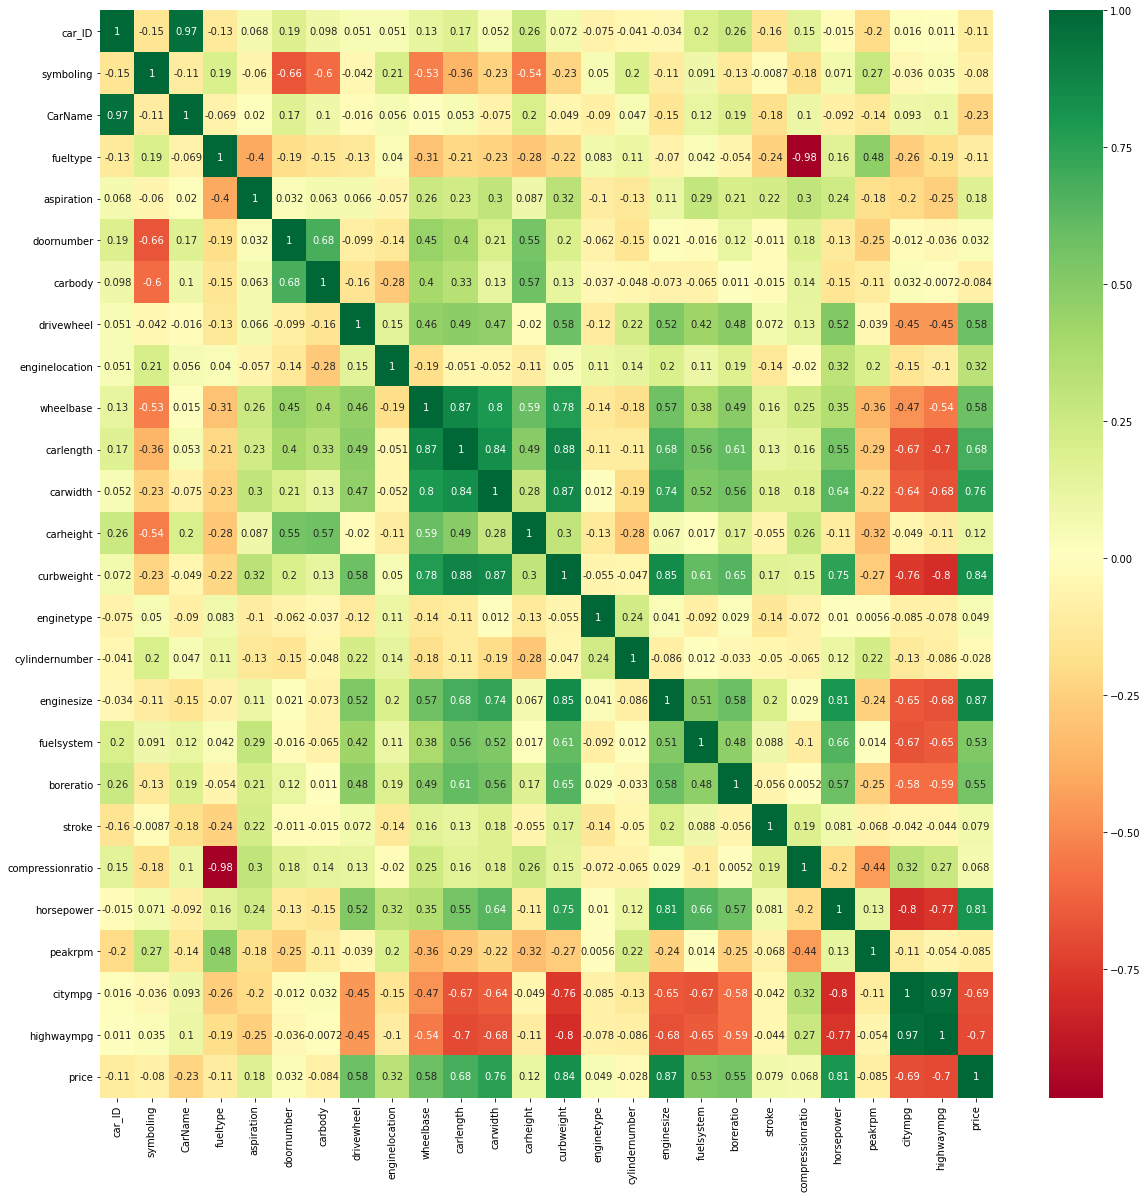

In [ ]:
fig = plt.figure(figsize=(20, 20))
sns.heatmap(dataset.corr(), annot=True, cmap="RdYlGn")

In [ ]:
# Selecting the best columns
car_data = dataset[['drivewheel', 'enginelocation', 'wheelbase', 'carlength',
                    'carwidth', 'curbweight', 'enginesize', 'fuelsystem', 
                    'boreratio', 'horsepower', 'price']]
car_data.head()

,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,boreratio,horsepower,price
0,2,0,88.6,168.8,64.1,2548,130,5,3.47,111,13495.0
1,2,0,88.6,168.8,64.1,2548,130,5,3.47,111,16500.0
2,2,0,94.5,171.2,65.5,2823,152,5,2.68,154,16500.0
3,1,0,99.8,176.6,66.2,2337,109,5,3.19,102,13950.0
4,0,0,99.4,176.6,66.4,2824,136,5,3.19,115,17450.0


In [ ]:
# Separating the inputs and labels
data = car_data.loc[:, car_data.columns != 'price']
labels = car_data['price']

In [ ]:
data.describe()

,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,boreratio,horsepower
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,1.326829,0.014634,98.756585,174.049268,65.907805,2555.565854,126.907317,3.253659,3.329756,104.117073
std,0.556171,0.120377,6.021776,12.337289,2.145204,520.680204,41.642693,2.013204,0.270844,39.544167
min,0.000000,0.000000,86.600000,141.100000,60.300000,1488.000000,61.000000,0.000000,2.540000,48.000000
25%,1.000000,0.000000,94.500000,166.300000,64.100000,2145.000000,97.000000,1.000000,3.150000,70.000000
50%,1.000000,0.000000,97.000000,173.200000,65.500000,2414.000000,120.000000,5.000000,3.310000,95.000000
75%,2.000000,0.000000,102.400000,183.100000,66.900000,2935.000000,141.000000,5.000000,3.580000,116.000000
max,2.000000,1.000000,120.900000,208.100000,72.300000,4066.000000,326.000000,7.000000,3.940000,288.000000


In [ ]:
# Spliting into train and test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.3, random_state=42)

In [ ]:
train_data.head()

,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,boreratio,horsepower
177,1,0,102.4,175.6,66.5,2458,122,5,3.31,92
75,2,0,102.7,178.4,68.0,2910,140,5,3.78,175
174,1,0,102.4,175.6,66.5,2480,110,3,3.27,73
31,1,0,86.6,144.6,63.9,1819,92,0,2.91,76
12,2,0,101.2,176.8,64.8,2710,164,5,3.31,121


In [ ]:
# Normalizing the data
norm_cols = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower']
mean = train_data.loc[:,norm_cols].mean(axis=0)
std = train_data.loc[:,norm_cols].std(axis=0)

train_data.loc[:,norm_cols] = (train_data.loc[:,norm_cols]-mean) / std
test_data.loc[:,norm_cols] = (test_data.loc[:,norm_cols]-mean) / std

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [ ]:
# Creating our model with the given hyperparameters
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=((train_data.shape[1],))))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1))

In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_data, train_labels, epochs=500, validation_split=0.2, verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 95ms/step - loss: 244663190.4000 - mae: 13631.8648 - val_loss: 293832640.0000 - val_mae: 14396.9971
Epoch 2/500
4/4 [==============================] - 0s 17ms/step - loss: 245248214.4000 - mae: 13586.3885 - val_loss: 293831456.0000 - val_mae: 14396.9658
Epoch 3/500
4/4 [==============================] - 0s 18ms/step - loss: 226995222.4000 - mae: 13261.2527 - val_loss: 293830368.0000 - val_mae: 14396.9307
Epoch 4/500
4/4 [==============================] - 0s 18ms/step - loss: 225413555.2000 - mae: 13270.5553 - val_loss: 293829184.0000 - val_mae: 14396.8945
Epoch 5/500
4/4 [==============================] - 0s 16ms/step - loss: 237790147.2000 - mae: 13287.5596 - val_loss: 293827904.0000 - val_mae: 14396.8525
Epoch 6/500
4/4 [==============================] - 0s 16ms/step - loss: 231320144.0000 - mae: 13358.2291 - val_loss: 293826368.0000 - val_mae: 14396.8037
Epoch 7/500
4/4 [==============================] - 0s 17ms/step - loss: 2257

In [ ]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

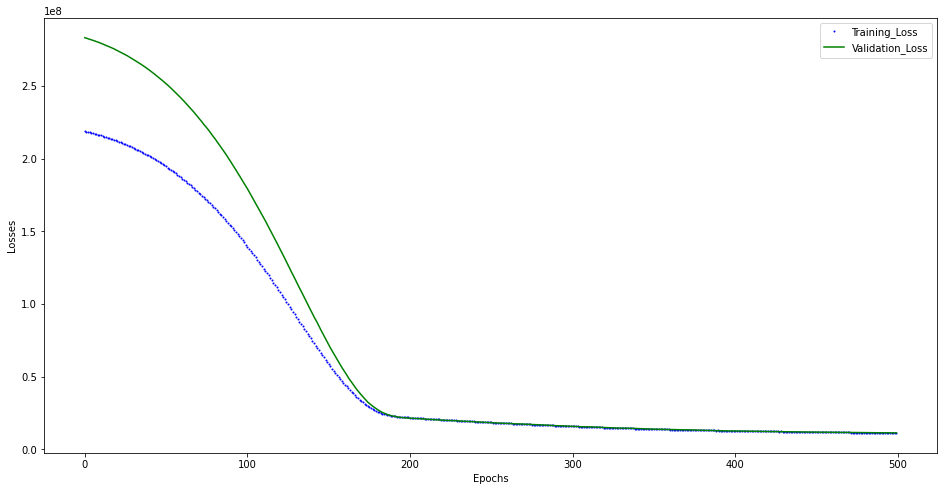

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(500)
fig = plt.figure(figsize=(16,8))
plt.plot(epochs, loss, 'bo', label='Training_Loss', markersize=1)
plt.plot(epochs, val_loss, 'g', label='Validation_Loss')
plt.xlabel('Epochs')
plt.ylabel("Losses")
plt.legend()
plt.show()

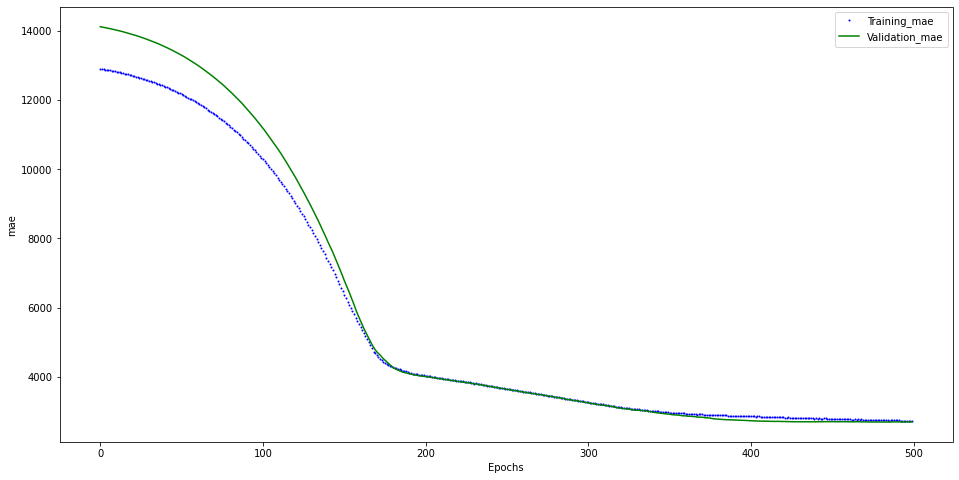

In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(500)
fig = plt.figure(figsize=(16,8))
plt.plot(epochs, mae, 'bo', label='Training_mae', markersize=1)
plt.plot(epochs, val_mae, 'g', label='Validation_mae')
plt.xlabel('Epochs')
plt.ylabel("mae")
plt.legend()
plt.show()

In [ ]:
# Increasing layers and number of units 
model1 = models.Sequential()
model1.add(layers.Dense(10, activation='relu', input_shape=((train_data.shape[1],))))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1))

In [ ]:
model1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 3,439
Trainable params: 3,439
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model1.fit(train_data, train_labels, epochs=500, validation_split=0.2, verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 75ms/step - loss: 207331369.6000 - mae: 12568.8062 - val_loss: 293787040.0000 - val_mae: 14395.6650
Epoch 2/500
4/4 [==============================] - 0s 16ms/step - loss: 259154838.4000 - mae: 13787.2662 - val_loss: 293759904.0000 - val_mae: 14394.8525
Epoch 3/500
4/4 [==============================] - 0s 17ms/step - loss: 214628166.4000 - mae: 12830.3842 - val_loss: 293721568.0000 - val_mae: 14393.7402
Epoch 4/500
4/4 [==============================] - 0s 16ms/step - loss: 207458188.8000 - mae: 12725.0963 - val_loss: 293675712.0000 - val_mae: 14392.4131
Epoch 5/500
4/4 [==============================] - 0s 17ms/step - loss: 203006913.6000 - mae: 12567.0689 - val_loss: 293619424.0000 - val_mae: 14390.8018
Epoch 6/500
4/4 [==============================] - 0s 17ms/step - loss: 203955427.2000 - mae: 12530.4553 - val_loss: 293549280.0000 - val_mae: 14388.7871
Epoch 7/500
4/4 [==============================] - 0s 18ms/step - loss: 2148

In [ ]:
mse = history1.history['val_mae']
mse = np.asarray(mse)
np.argmin(mse), np.min(mse)

(492, 2482.2958984375)

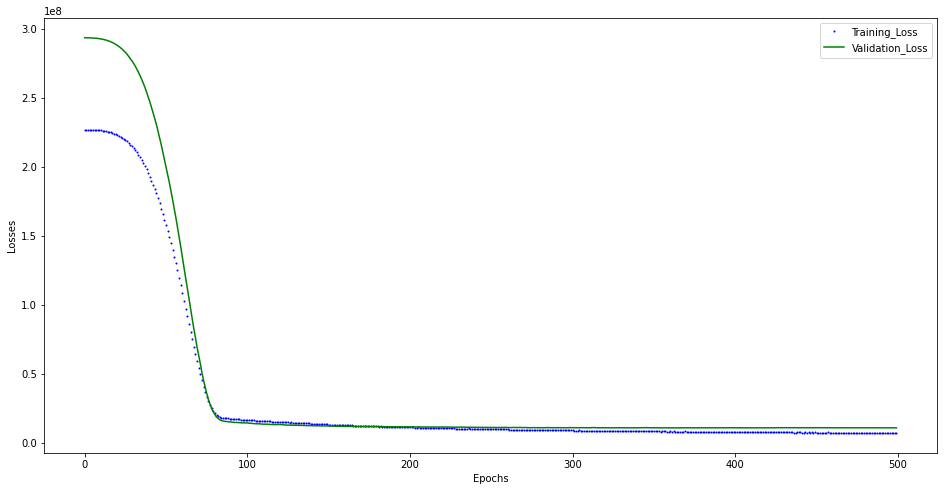

In [ ]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(500)
fig = plt.figure(figsize=(16,8))
plt.plot(epochs, loss, 'bo', label='Training_Loss', markersize=1)
plt.plot(epochs, val_loss, 'g', label='Validation_Loss')
plt.xlabel('Epochs')
plt.ylabel("Losses")
plt.legend()
plt.show()

# Creating Model with k-fold

In [ ]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(10, activation='relu', input_shape=((train_data.shape[1],))))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(6, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [ ]:
m = build_model()
m.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_43 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_44 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 7         
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________


In [ ]:
k = 3
num_val_samples = len(train_data) // k
num_epochs = 500
all_scores = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                      train_data[(i + 1) * num_val_samples:]], axis=0)

  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],
                                          train_labels[(i + 1) * num_val_samples:]], axis=0)
  model2 = build_model()
  model2.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2


In [ ]:
np.mean(all_scores)

2622.15576171875

# Evaluating the Models

In [ ]:
# First Model
model.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 6ms/step - loss: 16484856.0000 - mae: 3040.2661


[16484856.0, 3040.26611328125]

In [ ]:
# Second Model
model1.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 6ms/step - loss: 12905543.0000 - mae: 2479.8108


[12905543.0, 2479.810791015625]

In [ ]:
model2.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 7ms/step - loss: 15916416.0000 - mae: 2673.3547


[15916416.0, 2673.354736328125]